# Import Library and Dataset

In [ ]:
import pandas as pd

df = pd.read_csv('/content/dataset.csv')



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44446 entries, 0 to 44445
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44446 non-null  int64  
 1   gender              44446 non-null  object 
 2   masterCategory      44446 non-null  object 
 3   subCategory         44446 non-null  object 
 4   articleType         44446 non-null  object 
 5   baseColour          44431 non-null  object 
 6   season              44425 non-null  object 
 7   year                44445 non-null  float64
 8   usage               44129 non-null  object 
 9   productDisplayName  44439 non-null  object 
 10  Unnamed: 10         22 non-null     object 
 11  Unnamed: 11         2 non-null      object 
dtypes: float64(1), int64(1), object(10)
memory usage: 4.1+ MB


In [ ]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,Unnamed: 10,Unnamed: 11
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,NaN,NaN
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,NaN,NaN
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,NaN,NaN
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,NaN,NaN
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,NaN,NaN


# STEP 01: DATA CLEANING

In [ ]:
df.isnull().sum()

,0
id,0
gender,0
masterCategory,0
subCategory,0
articleType,0
baseColour,15
season,21
year,1
usage,317
productDisplayName,7


In [ ]:
df_cleaned = df.copy()

In [ ]:
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-7-523fbb2d88a2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
for col in df.select_dtypes(include='number').columns:
    df[col].fillna(df[col].median(), inplace=True)

<ipython-input-8-06394e7946b0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [ ]:
string_columns = df.select_dtypes(include='object').columns
for col in string_columns:
    df[col] = df[col].str.strip().str.title()

In [ ]:
df['year'] = df['year'].astype(int)

In [ ]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [ ]:
df.isnull().sum()

,0
id,0
gender,0
masterCategory,0
subCategory,0
articleType,0
baseColour,0
season,0
year,0
usage,0
productDisplayName,0


In [ ]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-Shirt


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44446 entries, 0 to 44445
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  44446 non-null  int64 
 1   gender              44446 non-null  object
 2   masterCategory      44446 non-null  object
 3   subCategory         44446 non-null  object
 4   articleType         44446 non-null  object
 5   baseColour          44446 non-null  object
 6   season              44446 non-null  object
 7   year                44446 non-null  int64 
 8   usage               44446 non-null  object
 9   productDisplayName  44446 non-null  object
dtypes: int64(2), object(8)
memory usage: 3.4+ MB


# STEAP 02: EDA

In [ ]:
df.describe()

,id,year
count,44446.000000,44446.000000
mean,29692.631350,2012.805922
std,17048.234982,2.126381
min,1163.000000,2007.000000
25%,14770.250000,2011.000000
50%,28609.500000,2012.000000
75%,44678.750000,2015.000000
max,60000.000000,2019.000000


In [ ]:
df.duplicated().sum()


np.int64(0)

In [ ]:
df.select_dtypes(include='object').nunique()

,0
gender,5
masterCategory,7
subCategory,45
articleType,143
baseColour,46
season,4
usage,8
productDisplayName,31008


In [ ]:
print(df['gender'].value_counts())
print(df['masterCategory'].value_counts())
print(df['subCategory'].value_counts().head(10))
print(df['articleType'].value_counts().head(10))
print(df['season'].value_counts())
print(df['usage'].value_counts())

gender
Men       22165
Women     18632
Unisex     2164
Boys        830
Girls       655
Name: count, dtype: int64
masterCategory
Apparel           21400
Accessories       11289
Footwear           9222
Personal Care      2404
Free Items          105
Sporting Goods       25
Home                  1
Name: count, dtype: int64
subCategory
Topwear       15405
Shoes          7344
Bags           3055
Bottomwear     2694
Watches        2542
Innerwear      1808
Jewellery      1080
Eyewear        1073
Fragrance      1012
Sandal          963
Name: count, dtype: int64
articleType
Tshirts         7070
Shirts          3217
Casual Shoes    2846
Watches         2542
Sports Shoes    2036
Kurtas          1844
Tops            1762
Handbags        1759
Heels           1323
Sunglasses      1073
Name: count, dtype: int64
season
Summer    21497
Fall      11445
Winter     8519
Spring     2985
Name: count, dtype: int64
usage
Casual          34731
Sports           4025
Ethnic           3208
Formal           2359
S

In [ ]:
df['year'].min(), df['year'].max()

(2007, 2019)

# STEP 03: EDA (DATA VISUALIZATION)

**Univariate Visualization**

<ipython-input-20-3d182d6db1ad>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='gender', palette='Set2')


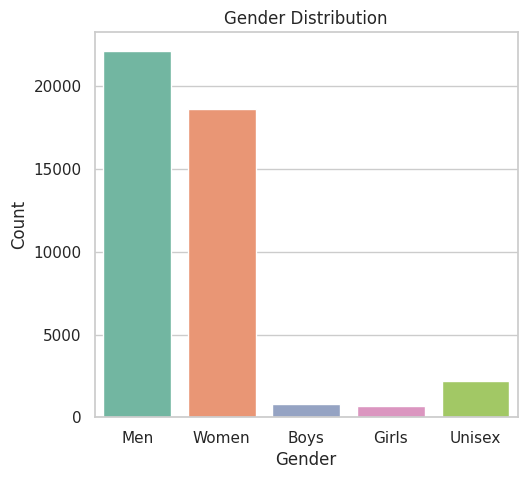

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=df_cleaned, x='gender', palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


<ipython-input-21-e89aa1b3ce69>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='season', palette='Set3')


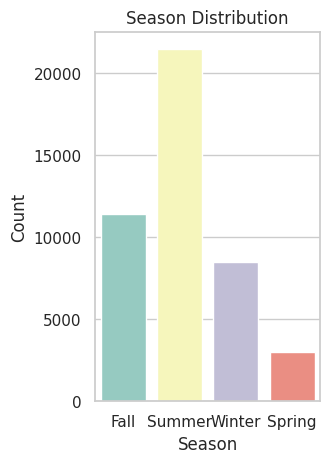

In [ ]:
plt.subplot(1, 2, 2)
sns.countplot(data=df_cleaned, x='season', palette='Set3')
plt.title('Season Distribution')
plt.xlabel('Season')
plt.ylabel('Count')

plt.show()

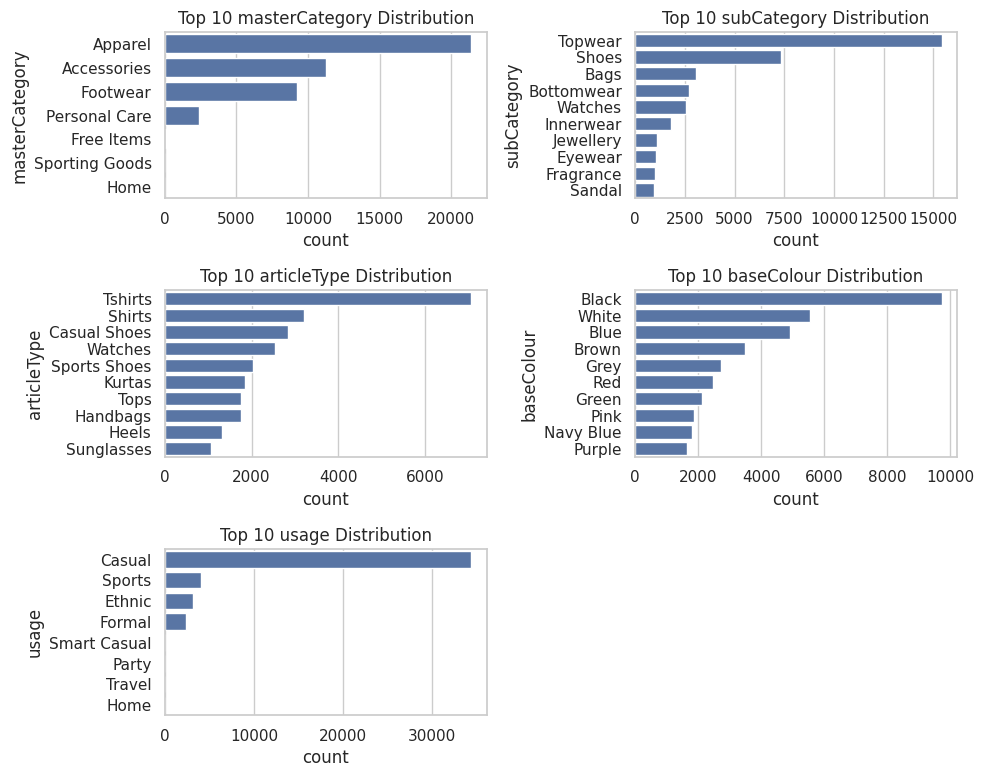

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 10))

categorical_columns = ['masterCategory', 'subCategory', 'articleType', 'baseColour', 'usage']

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 2, i)
    sns.countplot(data=df_cleaned, y=col, order=df_cleaned[col].value_counts().index[:10])
    plt.title(f'Top 10 {col} Distribution')
    plt.tight_layout()
plt.show()


**Bivariate Visualization**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Shirts'),
  Text(1, 0, 'Watches'),
  Text(2, 0, 'Tshirts'),
  Text(3, 0, 'Casual Shoes'),
  Text(4, 0, 'Handbags'),
  Text(5, 0, 'Tops'),
  Text(6, 0, 'Kurtas'),
  Text(7, 0, 'Sports Shoes'),
  Text(8, 0, 'Heels'),
  Text(9, 0, 'Sunglasses')])

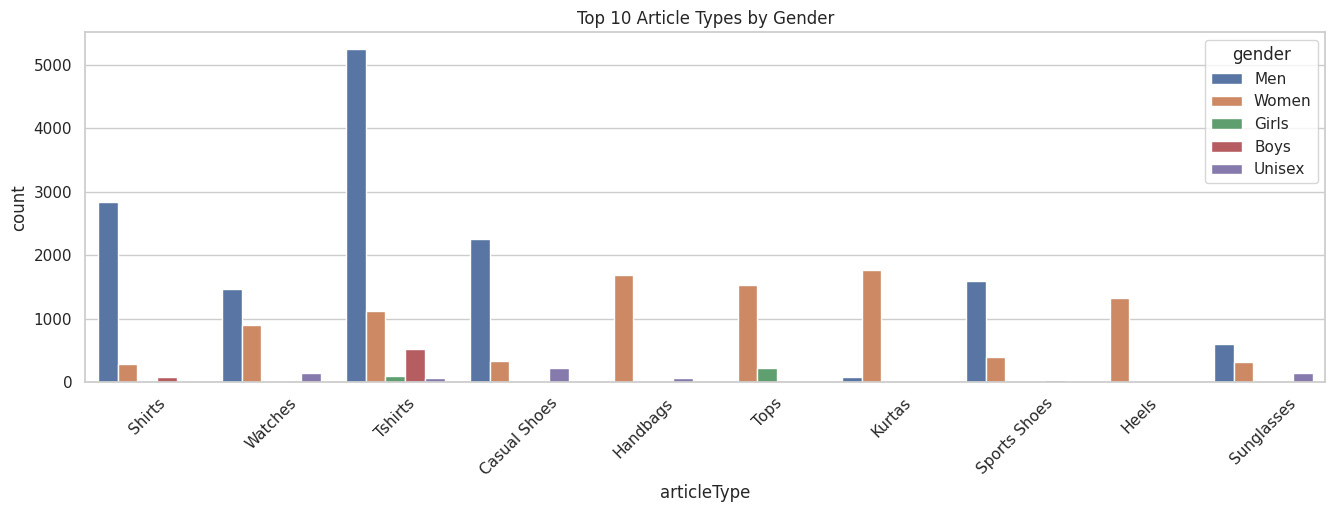

In [ ]:
plt.figure(figsize=(16, 10))
plt.subplot(2, 1, 1)
top_articles = df_cleaned['articleType'].value_counts().nlargest(10).index
sns.countplot(data=df_cleaned[df_cleaned['articleType'].isin(top_articles)], x='articleType', hue='gender')
plt.title('Top 10 Article Types by Gender')
plt.xticks(rotation=45)

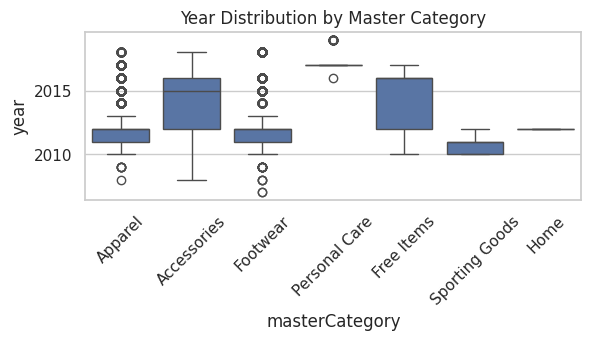

In [ ]:
plt.subplot(2, 1, 2)
sns.boxplot(data=df_cleaned, x='masterCategory', y='year')
plt.title('Year Distribution by Master Category')
plt.xticks(rotation=45)
plt.show()

In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px
import plotly.express as px

top_articles = df_cleaned['articleType'].value_counts().nlargest(10).index
filtered_df = df_cleaned[df_cleaned['articleType'].isin(top_articles)]

fig = px.histogram(filtered_df,
                   x='articleType', color='gender',
                   barmode='group',
                   title='Top 10 Article Types by Gender')
fig.show()


In [ ]:
fig = px.histogram(df_cleaned,
                   x='season', color='usage',
                   barmode='group',
                   title='Usage by Season')
fig.show()


In [ ]:
fig = px.sunburst(df_cleaned,
                  path=['masterCategory', 'subCategory'],
                  title='Hierarchy: MasterCategory → SubCategory')
fig.show()

In [ ]:
fig = px.box(df_cleaned[df_cleaned['articleType'].isin(top_articles)],
             x='articleType', y='year',
             title='Article Type by Year')
fig.show()


# **STEP 04: MACHINE LEARNING MODELS**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score
import warnings

In [ ]:
features = ['gender', 'masterCategory', 'subCategory', 'baseColour', 'season', 'usage', 'year']
target = 'articleType'
df_model = df_cleaned[features + [target]].dropna()

In [ ]:
le_dict = {}
for col in df_model.columns:
    if df_model[col].dtype == 'object':
        le = LabelEncoder()
        df_model[col] = le.fit_transform(df_model[col])
        le_dict[col] = le

X = df_model[features]
y = df_model[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": make_pipeline(StandardScaler(), LogisticRegression(max_iter=100)),
    "SVM": make_pipeline(StandardScaler(), SVC())
}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\nModel: {name}")
    print("Accuracy:", accuracy_score(y_test, preds))
    print(classification_report(y_test, preds, zero_division=0))


Model: Random Forest
Accuracy: 0.7666931186940256
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.00      0.00      0.00         3
           2       0.66      0.87      0.75       142
           3       0.47      0.44      0.45        16
           4       1.00      0.50      0.67         2
           5       0.00      0.00      0.00         7
           7       0.99      1.00      1.00       150
           8       0.00      0.00      0.00         2
          11       1.00      1.00      1.00         1
          12       0.60      0.25      0.35        12
          13       0.60      0.83      0.70        83
          14       0.46      0.50      0.48        12
          15       0.64      0.76      0.69       174
          16       0.00      0.00      0.00         8
          17       0.27      0.48      0.35        29
          18       0.98      0.96      0.97        56
          19       0.95      0

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




Model: Logistic Regression
Accuracy: 0.6732796735064052
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.00      0.00      0.00         3
           2       0.53      0.79      0.63       142
           3       0.00      0.00      0.00        16
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         7
           7       0.71      0.61      0.65       150
           8       0.00      0.00      0.00         2
          11       1.00      1.00      1.00         1
          12       0.00      0.00      0.00        12
          13       0.44      0.88      0.58        83
          14       0.00      0.00      0.00        12
          15       0.56      0.70      0.62       174
          16       0.00      0.00      0.00         8
          17       0.00      0.00      0.00        29
          18       0.70      0.80      0.75        56
          19       0.94 

In [ ]:
accuracies = {}
warnings.filterwarnings("ignore")
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    accuracies[name] = acc
    print(f"{name}: {acc * 100:.2f}% accuracy")

Random Forest: 76.67% accuracy
Logistic Regression: 67.33% accuracy
SVM: 73.86% accuracy


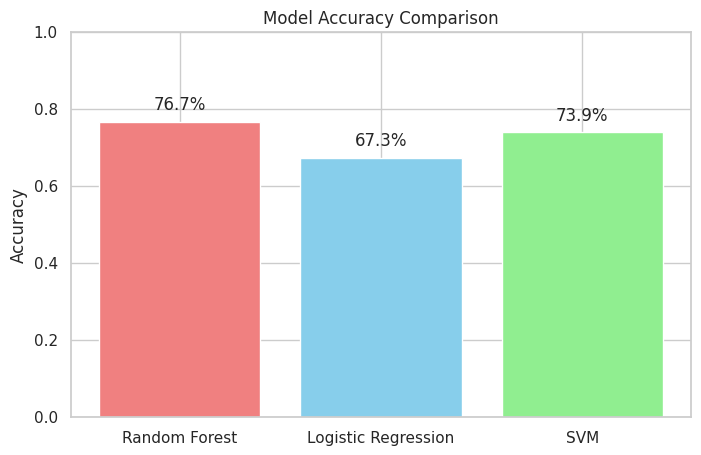

In [ ]:
plt.figure(figsize=(8,5))
bars = plt.bar(accuracies.keys(), accuracies.values(), color=['lightcoral', 'skyblue', 'lightgreen'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval * 100:.1f}%', ha='center', va='bottom')

plt.show()


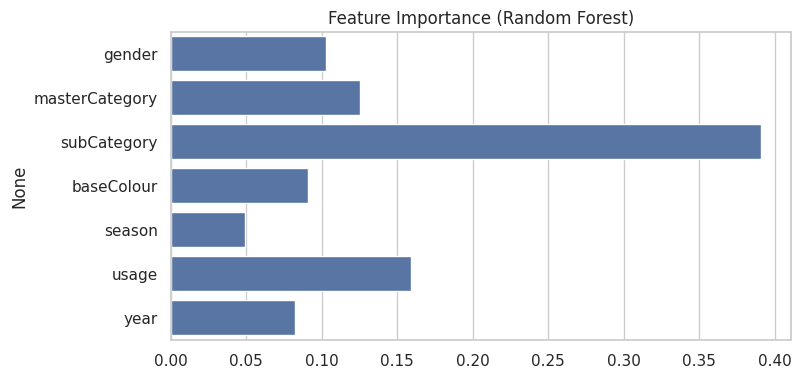

In [ ]:
importances = models['Random Forest'].feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(8, 4))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance (Random Forest)')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)


Best Parameters: {'max_depth': 20, 'n_estimators': 100}
